In [11]:
import matplotlib.lines as mlines
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
%matplotlib inline

In [1]:
def error(scorelist):
    return 2*(np.std(scorelist)/math.sqrt(len(scorelist)))

def signal_vs_noise(signalfile,noisefile):

    noisedf=pd.read_csv(noisefile, sep='\t')



    signalbestscores=dict()
    noisebestscores=dict()
    numreplacedset=set()
    metricset=set()
    signalmeanbestscores=dict()
    next(signalfile)
    for line in signalfile:
        queryid,numreplaced,match_bp_sym_pic,bp_sym_pic,match_bp_sym_aic,bp_sym_aic,match_bp_asym_pic,bp_asym_pic,match_bp_asym_aic,bp_asym_aic,match_ap_pic,ap_pic,match_ap_aic,ap_aic,match_bp_asym_simj,bp_asym_simj,match_bp_sym_simj,bp_sym_simj,match_ap_simj,ap_simj=line.strip().split("\t")
        numreplaced=int(numreplaced)
    

        if numreplaced not in signalbestscores:
            signalbestscores[numreplaced]=dict()
            numreplacedset.add(numreplaced)
        
        metric="bp_sym_pic"

        metricset.add(metric)
        noisebestscores[metric]=noisedf[metric]
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(bp_sym_pic))

        metric="bp_sym_aic"
        noisebestscores[metric]=noisedf[metric]
        metricset.add(metric)
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(bp_sym_aic))


        metric="bp_asym_pic"
        noisebestscores[metric]=noisedf[metric]
        metricset.add(metric)
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(bp_asym_pic))

        metric="bp_asym_aic"
        noisebestscores[metric]=noisedf[metric]
        metricset.add(metric)
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(bp_asym_aic))


        metric="ap_pic"
        noisebestscores[metric]=noisedf[metric]
        metricset.add(metric)
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(ap_pic))

        metric="ap_aic"
        noisebestscores[metric]=noisedf[metric]
        metricset.add(metric)
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(ap_aic))

        metric="bp_sym_simj"
        noisebestscores[metric]=noisedf[metric]
        metricset.add(metric)
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(bp_sym_simj))

        metric="bp_asym_simj"
        noisebestscores[metric]=noisedf[metric]
        metricset.add(metric)
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(bp_asym_simj))

        metric="ap_simj"
        noisebestscores[metric]=noisedf[metric]
        metricset.add(metric)
        if metric not in signalbestscores[numreplaced]:
            signalbestscores[numreplaced][metric]=[]
        signalbestscores[numreplaced][metric].append(float(ap_simj))

    signalfile.close()
    fig=plt.figure()
    for metric in sorted(metricset):
        signallist=[]
        errorlist=[]
        percentilelist=[]
        for numreplaced in sorted(numreplacedset):
            signallist.append(np.mean(signalbestscores[numreplaced][metric]))
            errorlist.append(error(signalbestscores[numreplaced][metric]))
            percentilelist.append(stats.percentileofscore(noisebestscores[metric],np.mean(signalbestscores[numreplaced][metric])))

        
    title=dict()
    title['ap_aic']="Annotation IC"
    title['ap_pic']="All Pairs \n\n Profile IC"
    title['ap_simj']="Jaccard"
    title['bp_asym_aic']="Annotation IC"
    title['bp_asym_pic']="Best Pairs Asymmetric\n\nProfile IC"
    title['bp_asym_simj']="Jaccard"
    title['bp_sym_aic']="Annotation IC"
    title['bp_sym_pic']="Best Pairs Symmetric\n\nProfile IC"
    title['bp_sym_simj']="Jaccard"
    f, axarr = plt.subplots(3, 3)
    i=j=0
    for metric in sorted(metricset):
        signallist=[]
        errorlist=[]
        percentilelist=[np.percentile(noisebestscores[metric],99),np.percentile(noisebestscores[metric],99.9)]
        alphalist=['#B6B6B4','#736F6E','#0C090A']
        for numreplaced in sorted(numreplacedset):
            signallist.append(np.mean(signalbestscores[numreplaced][metric]))
            errorlist.append(error(signalbestscores[numreplaced][metric]))
        axarr[i, j].errorbar(list(sorted(numreplacedset)),signallist,yerr=errorlist,color='black')
        axarr[i,j].axhline(y=np.percentile(noisebestscores[metric],99),linestyle='--',color='orange')
        axarr[i,j].axhline(y=np.percentile(noisebestscores[metric],99.9),linestyle='--',color='blue',label='x')
        axarr[i, j].set_title(title[metric])
        axarr[i, j].set_ylim(0,1.1)
        axarr[i, j].set_xlim(0,11)
        
        j+=1
        if j==3:
            i+=1
            j=0
        if i==3:
            i=0 
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)
    axarr[2,1].set_xlabel('Number of annotations replaced')
    axarr[1,0].set_ylabel('Similarity score')
    plt.tight_layout()  
    
    plt.show()

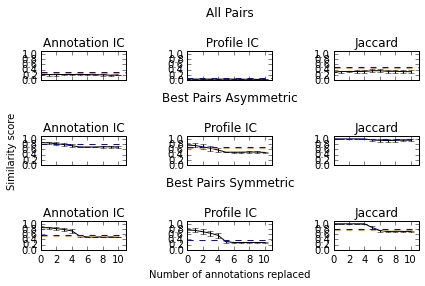

In [15]:
noisefile="../../results/Noise_Size10_BestMatches.tsv"
signalfile=open("../../results/Decay/Integrated_ProfileSize10_Results.tsv")
signal_vs_noise(signalfile,noisefile)